<a href="https://colab.research.google.com/github/chomchom69420/K6-DAQ-V1.0/blob/master/FRFT_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special

In [3]:
#generating a square wave signal for our analysis
def generate_square_wave(duration, frequency, sampling_rate):
    """Generate a square wave signal.
    
    Args:
        duration (float): Duration of the signal in seconds.
        frequency (float): Frequency of the square wave in Hz.
        sampling_rate (int): Number of samples per second (sampling frequency).
        
    Returns:
        numpy.ndarray: Square wave signal as a 1D NumPy array.
    """
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    signal = np.sign(np.sin(2 * np.pi * frequency * t))
    return signal

# Example usage
#duration = 1.0  # 1 second
#frequency = 5.0  # 5 Hz
#sampling_rate = 1000  # 1000 samples per second

#signal = generate_square_wave(duration, frequency, sampling_rate)

# Plot the generated square wave signal
#plt.plot(signal)
#plt.xlabel('Time')
#plt.ylabel('Amplitude')
#plt.title('Square Wave Signal')
#plt.show()


In [4]:
#generating a chirp signal for step 1
def generate_chirp(duration, start_frequency, end_frequency, sampling_rate):
    """Generate a chirp signal.
    
    Args:
        duration (float): Duration of the signal in seconds.
        start_frequency (float): Starting frequency of the chirp in Hz.
        end_frequency (float): Ending frequency of the chirp in Hz.
        sampling_rate (int): Number of samples per second (sampling frequency).
        
    Returns:
        numpy.ndarray: Chirp signal as a 1D NumPy array.
    """
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    phase = 2 * np.pi * (start_frequency * t + 0.5 * (end_frequency - start_frequency) * t**2 / duration)
    signal = np.sin(phase)
    return signal

# Example usage
#duration = 1.0  # 1 second
#start_frequency = 100.0  # 100 Hz
#end_frequency = 1000.0  # 1000 Hz
#sampling_rate = 10000  # 10000 samples per second

#signal = generate_chirp(duration, start_frequency, end_frequency, sampling_rate)

# Plot the generated chirp signal
#plt.plot(signal)
#plt.xlabel('Time')
#plt.ylabel('Amplitude')
#plt.title('Chirp Signal')
#plt.show()


In [5]:

#def generate_chirp_tantheta(duration, start_theta, end_theta, sampling_rate):
    #"""Generate a chirp signal using tan(theta).
    
    #Args:
     #   duration (float): Duration of the signal in seconds.
      #  start_theta (float): Starting value of theta in radians.
       # end_theta (float): Ending value of theta in radians.
        #sampling_rate (int): Number of samples per second (sampling frequency).
        
    #Returns:
     #   numpy.ndarray: Chirp signal as a 1D NumPy array.
    #"""
    #t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    #theta = np.linspace(start_theta, end_theta, int(duration * sampling_rate), endpoint=False)
    #frequency = np.tan(theta)
    #phase = np.cumsum(frequency) / sampling_rate
    #signal = np.sin(2 * np.pi * phase)
    #return signal

# Example usage
#duration = 1.0  # 1 second
#start_theta = 0.0  # Starting value of theta in radians
#end_theta = np.pi/2  # Ending value of theta in radians
#sampling_rate = 10000  # 10000 samples per second

#signal = generate_chirp_tantheta(duration, start_theta, end_theta, sampling_rate)

# Plot the generated chirp signal
#plt.plot(signal)
#plt.xlabel('Time')
#plt.ylabel('Amplitude')
#plt.title('Chirp Signal using tan(theta)')
#plt.show()


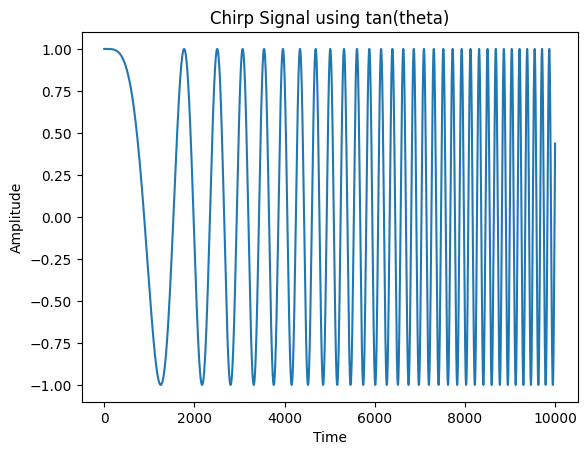

In [8]:
#generating a chirp function for different values of alpha
def generate_chirp_tantheta(duration, sampling_rate, alpha):
    """Generate a chirp signal using tan(theta).
    
    Args:
        duration (float): Duration of the signal in seconds.
        start_theta (float): Starting value of theta in radians.
        end_theta (float): Ending value of theta in radians.
        sampling_rate (int): Number of samples per second (sampling frequency).
        
    Returns:
        numpy.ndarray: Chirp signal as a 1D NumPy array.
    """
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    signal = np.exp(-1j*np.pi*(t**2)*np.tan(alpha*np.pi/2))
    return signal

# Example usage
duration = 1.0  # 1 second
#start_theta = 0.0  # Starting value of theta in radians
#end_theta = np.pi/2  # Ending value of theta in radians
sampling_rate = 10000  # 10000 samples per second
alpha = 0.99

signal = generate_chirp_tantheta(duration, sampling_rate, alpha)

# Plot the generated chirp signal
plt.plot(signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Chirp Signal using tan(theta)')
plt.show()

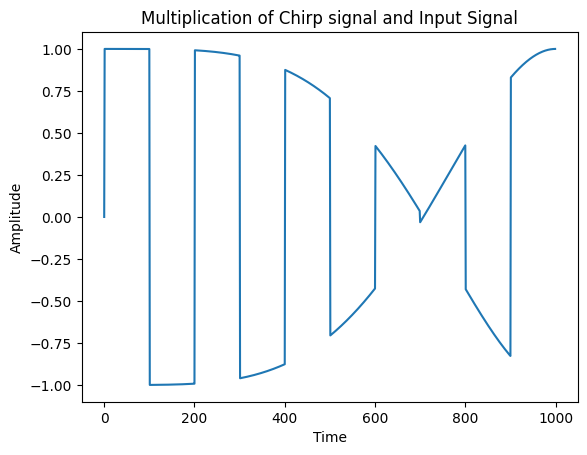

In [7]:
#Step1
#Multiplication of the function by chirp function

#here we take the square wave function as our signal

input_signal = generate_square_wave(1,5,1000)
chirp_signal = generate_chirp_tantheta(1,1000,0.5)

#multiplying the two functions

g_x = input_signal*chirp_signal

#plotting the intermediate function
plt.plot(g_x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Multiplication of Chirp signal and Input Signal')
plt.show()



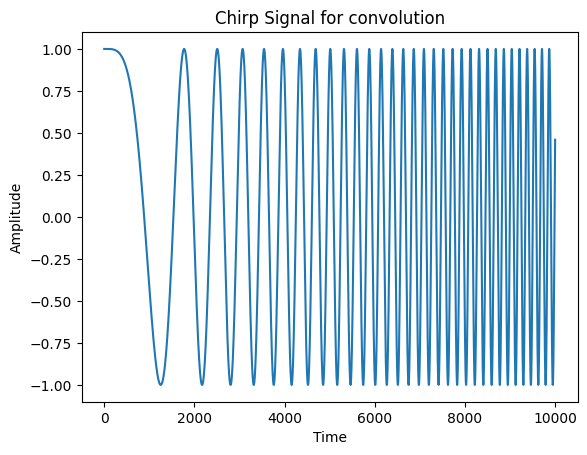

In [20]:
#generating the chirp number 2 : exp(i*pi*beta*x^2)
#here beta is csc phi
def generate_chirp_for_convolution(duration, sampling_rate, alpha):
    """Generate a chirp signal using tan(theta).
    
    Args:
        duration (float): Duration of the signal in seconds.
        start_theta (float): Starting value of theta in radians.
        end_theta (float): Ending value of theta in radians.
        sampling_rate (int): Number of samples per second (sampling frequency).
        
    Returns:
        numpy.ndarray: Chirp signal as a 1D NumPy array.
    """
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    signal = np.exp(1j*np.pi*(t**2)/np.sin(alpha*np.pi/2))
    return signal

# Example usage
duration = 1.0  # 1 second
#start_theta = 0.0  # Starting value of theta in radians
#end_theta = np.pi/2  # Ending value of theta in radians
sampling_rate = 10000  # 10000 samples per second
alpha = 0.01

#signal = generate_chirp_for_convolution(duration, sampling_rate, alpha)

# Plot the generated chirp signal
plt.plot(signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Chirp Signal for convolution')
plt.show()



/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


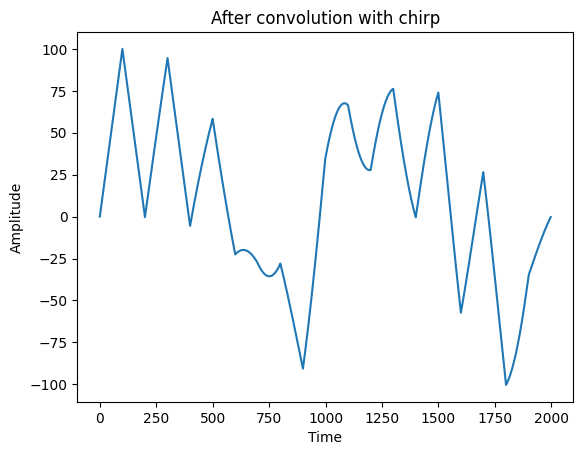

In [22]:
#convolution of g_x with the new chirp
import scipy.signal as sig
chirp2 = generate_chirp_for_convolution(1,1000,0.5)

g_dash_x = sig.fftconvolve(g_x, chirp2 , mode='full', axes=None)

#plot the g'x signal
plt.plot(g_dash_x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('After convolution with chirp')
plt.show()


In [30]:
#decimating g_dash_x
decimated_signal = g_dash_x[0:1000]
decimated_signal.size

1000

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


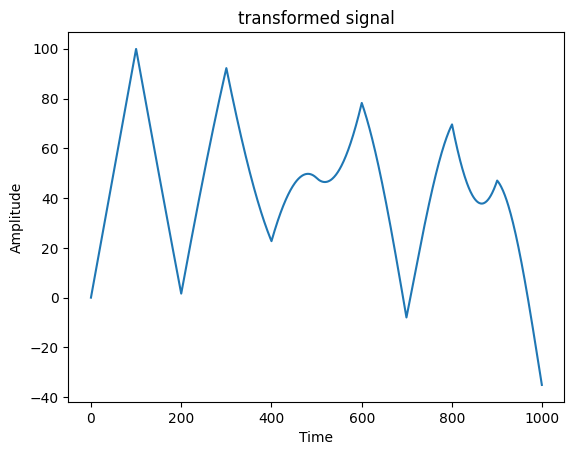

In [31]:

#doing the tantheta chirp multiplication again
chirp3 = generate_chirp_tantheta(1,1000,0.5)
out = chirp3*decimated_signal

#plot the output signal
plt.plot(out)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('transformed signal')
plt.show()
